In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func_langford(t, var, d, u, n, w, l, e):
    x, y, z = var
    dxdt = (z-u)*x - w*y
    dydt = w*x + (z-u)*y
    dzdt = n + d*z - (z**3)/3 - (x**2 + y**2)*(1 + l*z) + e*z*x**3
    return [dxdt, dydt, dzdt]

#パラメータ
d = 1
u = 0.7
n = 0.6
w = 3.5
l = 0.25
e = 0

t_span = [0.0, 115.0]
t_eval =np.arange(*t_span, 0.05)
var_init = [1,1,1]
sol = solve_ivp(func_langford, t_span, var_init, t_eval=t_eval, args=(d, u, n, w, l, e))

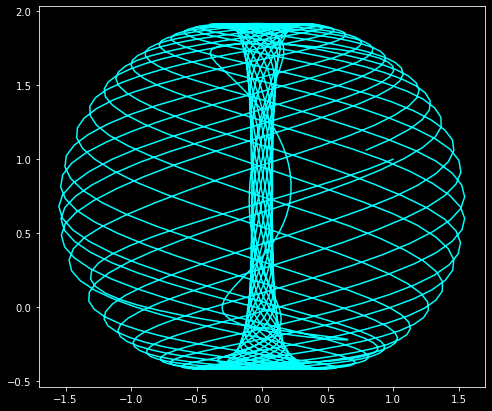

In [26]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8,7))
ax.plot(sol.y[0,:], sol.y[2,:], color='cyan')
plt.show()

# **xz-dimention_gif**

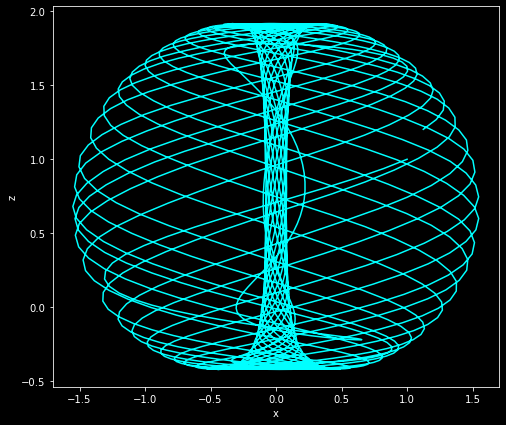

In [32]:
import matplotlib.animation as animation
plt.style.use('dark_background')
fig_ani_xz, ax_ani_xz= plt.subplots(figsize=(8,7))
ax_ani_xz.set_xlabel('x')
ax_ani_xz.set_ylabel('z')

ims = []
frame=3
for i in range(0, len(sol.y[0,:]), frame):
    im = ax_ani_xz.plot(sol.y[0,:][0:i], sol.y[2,:][0:i], color='cyan')
    ims.append(im)

ani = animation.ArtistAnimation(fig_ani_xz, ims, interval=10)
ani.save('./test_xz.gif', writer='pillow') 

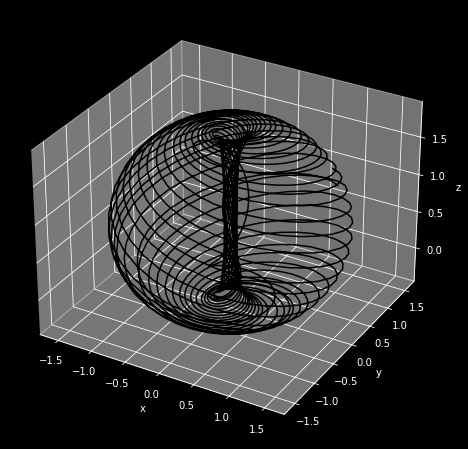

In [38]:
import matplotlib.colors as mcolors
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(sol.y[0,:], sol.y[1,:], sol.y[2,:], color='k')
plt.show()

# **3D-dimention_gif**

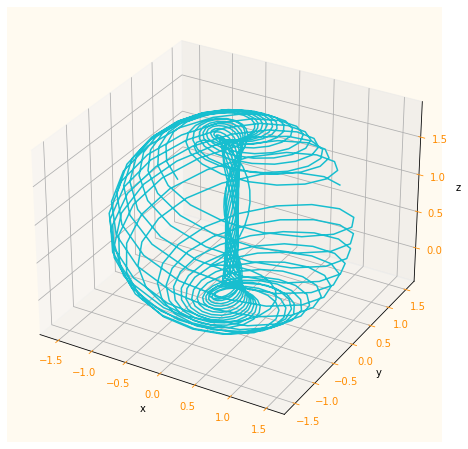

In [21]:
import matplotlib.animation as animation

fig_ani = plt.figure(figsize=(8,8))
ax_ani = fig_ani.add_subplot(111, projection='3d')
ax_ani.set_facecolor('floralwhite')
ax_ani.tick_params(colors = "darkorange")
ax_ani.set_xlabel('x')
ax_ani.set_ylabel('y')
ax_ani.set_zlabel('z')

ims = []

for i in range(len(sol.y[0,:])):
    im = ax_ani.plot(sol.y[0,:][0:i], sol.y[1,:][0:i], sol.y[2,:][0:i])
    ims.append(im)

ani = animation.ArtistAnimation(fig_ani, ims, interval=10)
ani.save('./test2.gif', writer='pillow') 

In [6]:
def func_lorenz(t, var, p, r, b):
    x, y, z = var
    dxdt = -p*x + p*y
    dydt = -x*z + r*x - y
    dzdt = x*y - b*z
    return [dxdt, dydt, dzdt]

p, r, b = 10., 28., 8./3.
var_init = [0, 1, 2]
t_span = [0.0, 50.0]
t_eval = np.linspace(*t_span,3000)
sol = solve_ivp(func_lorenz,t_span,var_init,method='RK45',t_eval=t_eval,args=(p,r,b,))

In [98]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 4778
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.66722241e-02, 3.33444481e-02, ...,
       4.99666556e+01, 4.99833278e+01, 5.00000000e+01])
 t_events: None
        y: array([[ 1.        ,  1.03415353,  1.13154195, ..., -1.41898364,
        -1.50091005, -1.61132635],
       [ 1.        ,  1.43538486,  1.89328951, ..., -1.82051856,
        -2.07531036, -2.36187647],
       [ 1.        ,  0.97663906,  0.96348232, ..., 16.50427559,
        15.83289633, 15.20061909]])
 y_events: None

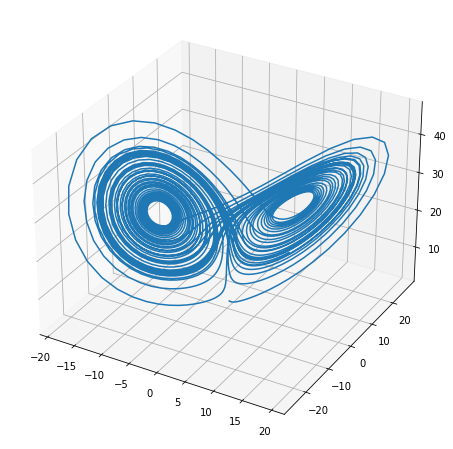

In [7]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot(sol.y[0,:], sol.y[1,:], sol.y[2,:])
plt.show()